In [1]:
#импортируем библиотеки для анализа 
import pandas as pd
import numpy as np

#импортируем библиотеки для визуализации  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [274]:
# зададим параметры для визуализации
sns.set(
    font_scale=2,
    style="whitegrid"
        )

In [3]:
# загружаем датасеты 
assessments         = pd.read_csv('assessments.csv')
courses             = pd.read_csv('courses.csv')
studentAssessment   = pd.read_csv('studentAssessment.csv')
studentRegistration = pd.read_csv('studentRegistration.csv')

## Оценочный анализ данных

Првоведем оценочный анализ данных и посмотрим на общее состояние данных. 

Файл **assessments** содержит информацию об оценках в тесте.

**code_module** — идентификационный код предмета.

**code_presentation** — семестр (Идентификационный код).

**id_assessment** — тест (Идентификационный номер ассессмента).

**assessment_type** — тип теста. Оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam).

**date** — информация об окончательной дате сдачи теста. Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0 (ноль).

**weight** — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех остальных оценок составляет 100%.

In [4]:
assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [5]:
assessments.head(10)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,NaN,100.0
6,AAA,2014J,1758,TMA,19.0,10.0
7,AAA,2014J,1759,TMA,54.0,20.0
8,AAA,2014J,1760,TMA,117.0,20.0
9,AAA,2014J,1761,TMA,166.0,20.0


In [6]:
assessments.query('assessment_type == "Exam"')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


In [7]:
assessments.query('assessment_type != "Exam"').groupby(['code_module', 'code_presentation'], as_index = False).agg({'weight':'sum'})

,code_module,code_presentation,weight
0,AAA,2013J,100.0
1,AAA,2014J,100.0
2,BBB,2013B,100.0
3,BBB,2013J,100.0
4,BBB,2014B,100.0
5,BBB,2014J,100.0
6,CCC,2014B,100.0
7,CCC,2014J,100.0
8,DDD,2013B,100.0
9,DDD,2013J,100.0


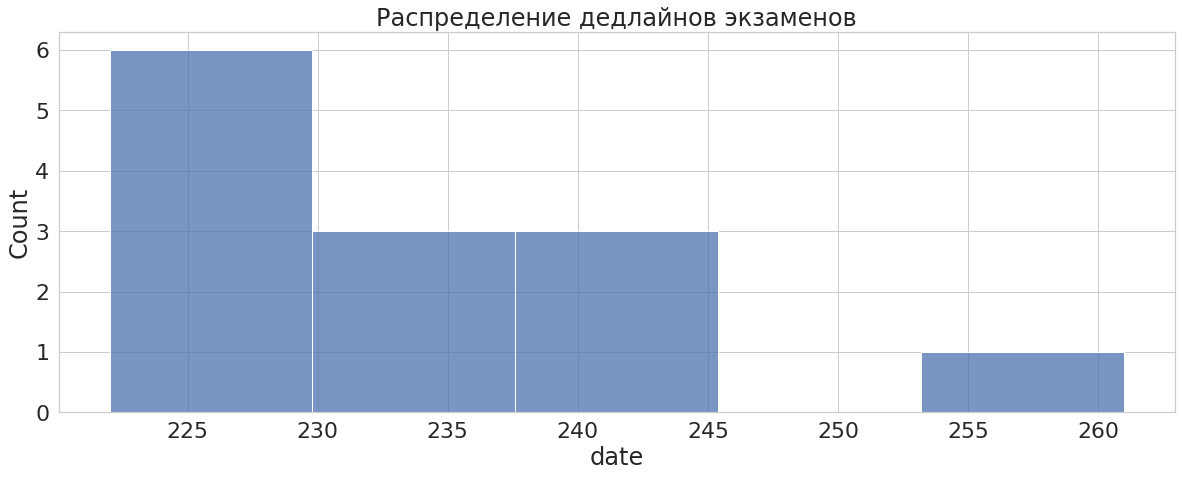

In [8]:
sns.histplot(assessments.query('assessment_type == "Exam"').date)
plt.title('Распределение дедлайнов экзаменов')
None

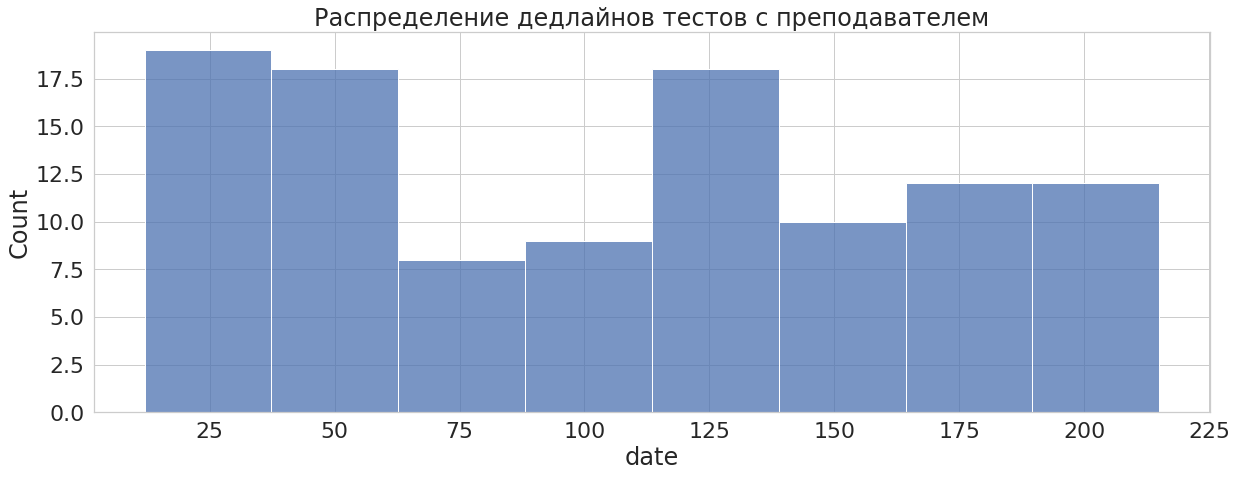

In [9]:
sns.histplot(assessments.query('assessment_type == "TMA"').date)
plt.title('Распределение дедлайнов тестов с преподавателем')
None

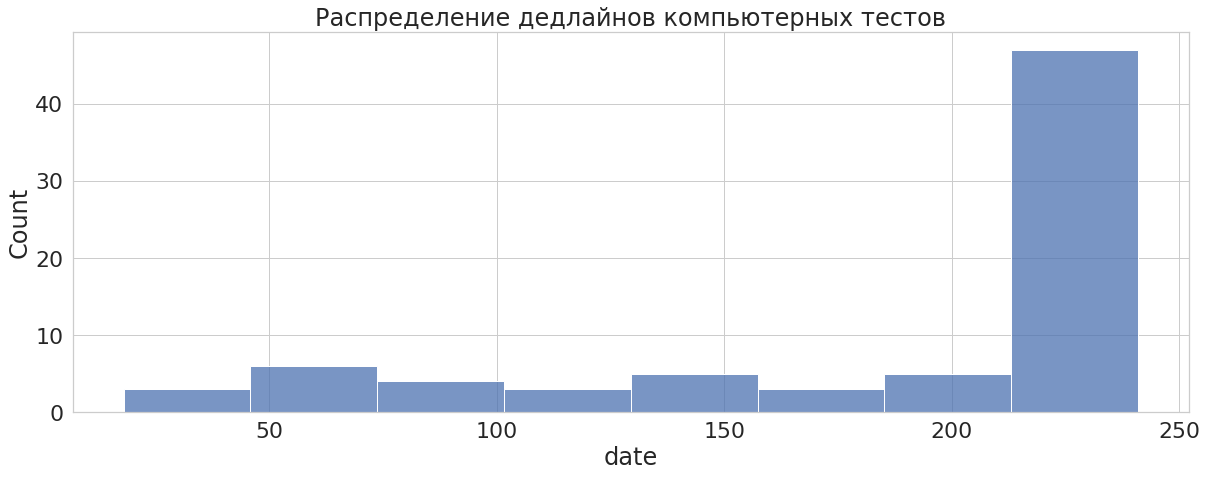

In [10]:
sns.histplot(assessments.query('assessment_type == "CMA"').date)
plt.title('Распределение дедлайнов компьютерных тестов')
None

=====================================================================================

Файл **courses** содержит список предметов по семестрам.

**code_module** — предмет (идентификационный код).

**code_presentation** — семестр (идентификационный код).

**module_presentation_length** — продолжительность семестра в днях.

In [11]:
courses.shape

(22, 3)

In [12]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [13]:
courses.head(22).sort_values('module_presentation_length')

,code_module,code_presentation,module_presentation_length
5,BBB,2014B,234
10,DDD,2013B,240
17,FFF,2013B,240
4,BBB,2013B,240
18,FFF,2014B,241
14,EEE,2014B,241
11,DDD,2014B,241
21,GGG,2014B,241
7,CCC,2014B,241
8,DDD,2013J,261


=====================================================================================

Файл **studentAssessment** содержит результаты тестов студентов. Если учащийся не отправляет работу на оценку, результат не записывается в таблицу.

**id_assessment** — тест (идентификационный номер).

**id_student** — идентификационный номер студента.

**date_submitted** — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.

**is_banked** — факт перезачета теста с прошлого семестра (иногда курсы перезачитывают студентам, вернувшимся из академического отпуска).

**score** — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. Оценка ниже 40 неудачная/неуспешная сдача теста.

In [14]:
studentAssessment.shape

(173912, 5)

In [15]:
studentAssessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [16]:
studentAssessment.head(5)

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [17]:
studentAssessment.query('score == "NaN"')

,id_assessment,id_student,date_submitted,is_banked,score
215,1752,721259,22,0,NaN
937,1754,260355,127,0,NaN
2364,1760,2606802,180,0,NaN
3358,14984,186780,77,0,NaN
3914,14984,531205,26,0,NaN
...,...,...,...,...,...
148929,34903,582670,241,0,NaN
159251,37415,610738,87,0,NaN
166390,37427,631786,221,0,NaN
169725,37435,648110,62,0,NaN


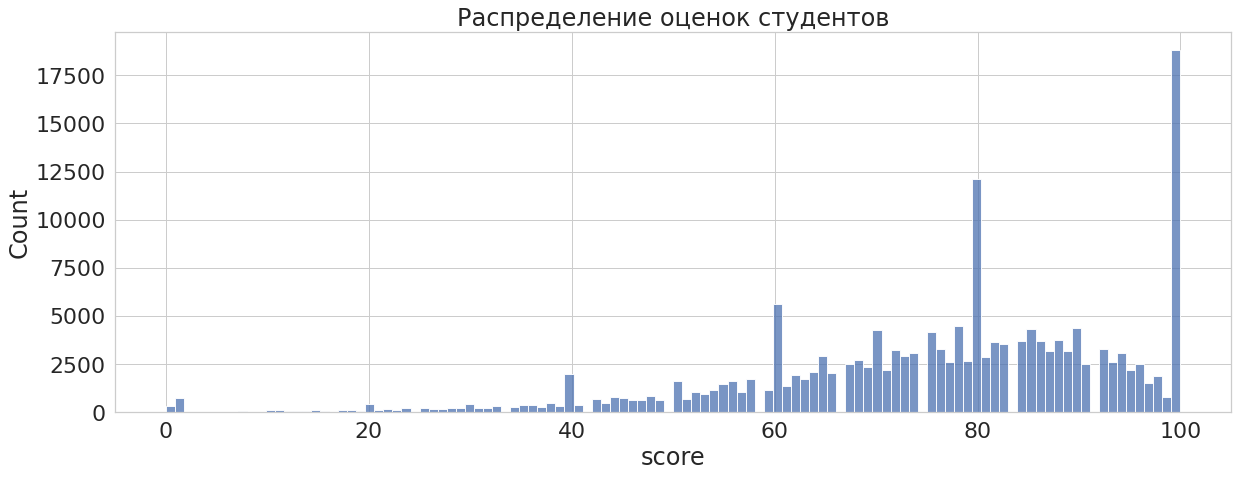

In [18]:
sns.histplot(studentAssessment.score)

plt.title('Распределение оценок студентов')
None

In [19]:
studentAssessment.score.describe()

count    173739.000000
mean         75.799573
std          18.798107
min           0.000000
25%          65.000000
50%          80.000000
75%          90.000000
max         100.000000
Name: score, dtype: float64

=====================================================================================

Файл **studentRegistration** содержит информацию о времени, когда студент зарегистрировался для прохождения курса в семестре.

**code_module** — предмет (идентификационный код).

**code_presentation** — семестр (идентификационный код)

**id_student** — идентификационный номер студента.

**date_registration** — дата регистрации студента. Это количество дней, измеренное от начала семестра (например, отрицательное значение -30 означает, что студент зарегистрировался на прохождение курса за 30 дней до его начала).

**date_unregistration** — дата отмены регистрации студента с предмета. У студентов, окончивших курс, это поле остается пустым.

In [20]:
studentRegistration.shape

(32593, 5)

In [21]:
studentRegistration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [22]:
studentRegistration.head(5)

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [23]:
studentRegistration.query('date_unregistration != "NaN"').count()

code_module            10072
code_presentation      10072
id_student             10072
date_registration      10033
date_unregistration    10072
dtype: int64

In [24]:
studentRegistration.query('date_registration > 0')

,code_module,code_presentation,id_student,date_registration,date_unregistration
29,AAA,2013J,106247,5.0,175.0
95,AAA,2013J,236284,2.0,NaN
160,AAA,2013J,341872,48.0,NaN
245,AAA,2013J,1472925,20.0,NaN
450,AAA,2014J,199897,3.0,NaN
...,...,...,...,...,...
32541,GGG,2014J,697364,3.0,25.0
32543,GGG,2014J,697492,4.0,NaN
32545,GGG,2014J,698065,5.0,75.0
32546,GGG,2014J,698163,3.0,NaN


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


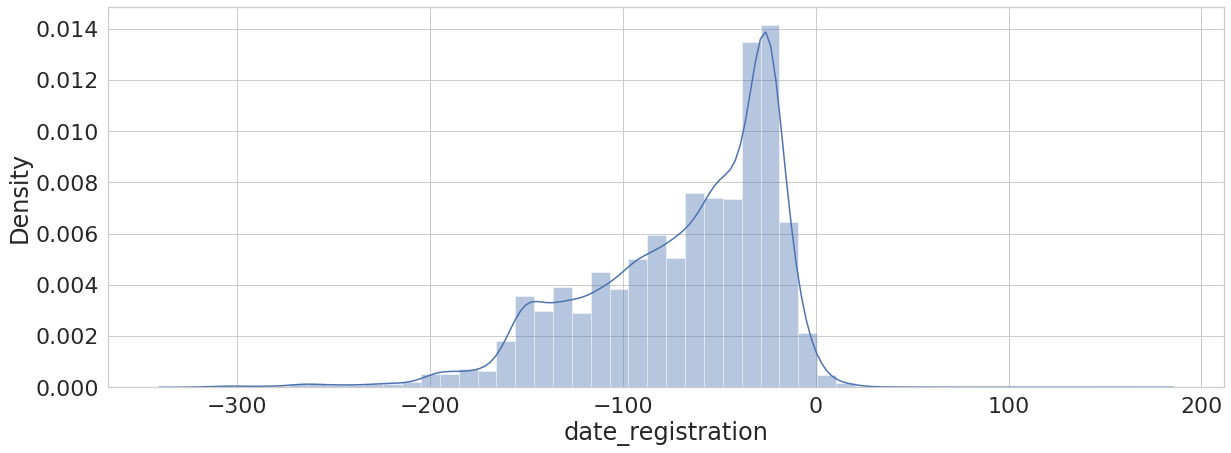

In [25]:
sns.distplot(studentRegistration.date_registration)
None

=====================================================================================

## Результат первичного анализа данных

   1. Файле **assessments** 206 записей при этом в столбце **date** есть 11 пропусков
   2. Пропуски в окончательной дате сдачи теста есть по предметам с id: ААА, ВВВ, ССС. Выбивается пропуск значения для предмета DDD в семестере 2014J, в другие семестры крайний срок сдачи экзамена указан. Вероятней всего пропуски по первым дисциплинам не являются ошибкой в данных, скорей всего эти дисциплины сдаются по результатам тестов, без экзамена. 
   3. На всех дисциплинах кроме GGG есть тесты с оценкой преподавателя (TMA) и компьютерной оценкой (СМА). Видимо по ней предусмотрен только экзамен.
   4. В таблице **studentAssessment** есть 173 пропущенных значения по столбцу **score**. Видимо эти данные утеряны, тк, если бы студент не сдавал тест, то не попал бы в таблицу. 
   5. В таблице **studentRegistration** есть 45 пропущенных значений по столбцу **date_registration**. Скорей всего потеря данных. 
   6. В таблице **studentRegistration** видно, что студенты 10072 раза покидали обучение по предмету при 32593 регистрациях на прохождение дисциплины
   7. Гистограмма с распределением тестов показывает, что экзамены проводятся в конце курса, что и логично. Тесты с преподавателем проводятся в большинстве дисциплин на начальном этапе курса и имеют более строгие дедлайны, а сдачу компьютерного тестирования можно отложить на конец курса по большей части курсов. 
   8. Из гистограммы оценок студентов видно, что на значениях 20,40,60,80,100 есть значительные всплески. Это может говорить о том, что по части тестов преподаватели могут упрощать шкалу оценивания до условной пятибальной или же эти значения могу быть психологически удобными для оценивания студентов.
   
   Для дальнейшего исследования необходимо определить, что будем считать курсом. По определению курсом считается предмет или набор предметов объединенных одной тематикой, курсы могут заканчиваться экзаменом или зачетом по итогам тестов. Посмотрим какие у нас есть курсы. 

Возьмем вектор курсов которые заканчиваются экзаменом из таблицы **assessments** и отфильтруем тублицу **studentAssessment** по полю **id_assessment**. Это даст нам таблицу с id экзаменов, студентов, датой сдачи и оценкой за экзамен.  

Для удобства смерджим таблицы с зарегистрировавшимися студентами и тестами

In [26]:
xx = pd.merge(studentRegistration, assessments, on = ['code_module','code_presentation'])

In [27]:
xx

,code_module,code_presentation,id_student,date_registration,date_unregistration,id_assessment,assessment_type,date,weight
0,AAA,2013J,11391,-159.0,NaN,1752,TMA,19.0,10.0
1,AAA,2013J,11391,-159.0,NaN,1753,TMA,54.0,20.0
2,AAA,2013J,11391,-159.0,NaN,1754,TMA,117.0,20.0
3,AAA,2013J,11391,-159.0,NaN,1755,TMA,166.0,20.0
4,AAA,2013J,11391,-159.0,NaN,1756,TMA,215.0,30.0
...,...,...,...,...,...,...,...,...,...
323920,GGG,2014J,2684003,-28.0,NaN,37443,CMA,229.0,0.0
323921,GGG,2014J,2684003,-28.0,NaN,37435,TMA,61.0,0.0
323922,GGG,2014J,2684003,-28.0,NaN,37436,TMA,124.0,0.0
323923,GGG,2014J,2684003,-28.0,NaN,37437,TMA,173.0,0.0


Добавим к получившейся таблице результаты сдачи тестов из **studentAssessment**

In [28]:
all_data = pd.merge(xx , studentAssessment, on = ['id_assessment','id_student'], how = 'left')

In [29]:
all_data

,code_module,code_presentation,id_student,date_registration,date_unregistration,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score
0,AAA,2013J,11391,-159.0,NaN,1752,TMA,19.0,10.0,18.0,0.0,78.0
1,AAA,2013J,11391,-159.0,NaN,1753,TMA,54.0,20.0,53.0,0.0,85.0
2,AAA,2013J,11391,-159.0,NaN,1754,TMA,117.0,20.0,115.0,0.0,80.0
3,AAA,2013J,11391,-159.0,NaN,1755,TMA,166.0,20.0,164.0,0.0,85.0
4,AAA,2013J,11391,-159.0,NaN,1756,TMA,215.0,30.0,212.0,0.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...
323920,GGG,2014J,2684003,-28.0,NaN,37443,CMA,229.0,0.0,NaN,NaN,NaN
323921,GGG,2014J,2684003,-28.0,NaN,37435,TMA,61.0,0.0,37.0,0.0,80.0
323922,GGG,2014J,2684003,-28.0,NaN,37436,TMA,124.0,0.0,114.0,0.0,80.0
323923,GGG,2014J,2684003,-28.0,NaN,37437,TMA,173.0,0.0,169.0,0.0,60.0


Для удобства сделаем уникальный айдишник для пары записей предмет/модуль

In [30]:
all_data['id_course'] = all_data.code_module + all_data.code_presentation

In [31]:
all_data

,code_module,code_presentation,id_student,date_registration,date_unregistration,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score,id_course
0,AAA,2013J,11391,-159.0,NaN,1752,TMA,19.0,10.0,18.0,0.0,78.0,AAA2013J
1,AAA,2013J,11391,-159.0,NaN,1753,TMA,54.0,20.0,53.0,0.0,85.0,AAA2013J
2,AAA,2013J,11391,-159.0,NaN,1754,TMA,117.0,20.0,115.0,0.0,80.0,AAA2013J
3,AAA,2013J,11391,-159.0,NaN,1755,TMA,166.0,20.0,164.0,0.0,85.0,AAA2013J
4,AAA,2013J,11391,-159.0,NaN,1756,TMA,215.0,30.0,212.0,0.0,82.0,AAA2013J
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323920,GGG,2014J,2684003,-28.0,NaN,37443,CMA,229.0,0.0,NaN,NaN,NaN,GGG2014J
323921,GGG,2014J,2684003,-28.0,NaN,37435,TMA,61.0,0.0,37.0,0.0,80.0,GGG2014J
323922,GGG,2014J,2684003,-28.0,NaN,37436,TMA,124.0,0.0,114.0,0.0,80.0,GGG2014J
323923,GGG,2014J,2684003,-28.0,NaN,37437,TMA,173.0,0.0,169.0,0.0,60.0,GGG2014J


Найдем количество зарегистрировавшихся студентов на каждый курс

In [32]:
(all_data.groupby(['id_student','id_course'], as_index = False)
     .agg({'code_presentation':'count'})
 .rename(columns={'code_presentation':'count_of_test'}))

,id_student,id_course,count_of_test
0,3733,DDD2013J,7
1,6516,AAA2014J,6
2,8462,DDD2013J,7
3,8462,DDD2014J,7
4,11391,AAA2013J,6
...,...,...,...
32588,2702660,FFF2014J,13
32589,2707979,DDD2013B,14
32590,2710343,DDD2013B,14
32591,2710343,DDD2014B,7


In [33]:
(all_data.groupby(['id_student','id_course'], as_index = False)
     .agg({'code_presentation':'count'})
 .rename(columns={'code_presentation':'count_of_test'})).groupby('id_course', as_index = False).agg({'count_of_test':'count'}).sort_values('count_of_test', ascending = False)

,id_course,count_of_test
7,CCC2014J,2498
18,FFF2014J,2365
5,BBB2014J,2292
16,FFF2013J,2283
3,BBB2013J,2237
9,DDD2013J,1938
6,CCC2014B,1936
11,DDD2014J,1803
2,BBB2013B,1767
15,FFF2013B,1614


В получившейся таблице видим количество регистраций на каждый учебный курс. Посмотрим подробней на самый популярный курс. 

In [34]:
students_on_courses = (all_data.groupby(['id_student','id_course'], as_index = False)
     .agg({'code_presentation':'count'})
 .rename(columns={'code_presentation':'count_of_test'})).groupby('id_course', as_index = False).agg({'count_of_test':'count'}).sort_values('count_of_test', ascending = False)

In [35]:
all_data.query('id_course == "CCC2014J" & assessment_type =="Exam"')

,code_module,code_presentation,id_student,date_registration,date_unregistration,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score,id_course
105012,CCC,2014J,23698,-110.0,NaN,24299,Exam,NaN,100.0,243.0,0.0,80.0,CCC2014J
105013,CCC,2014J,23698,-110.0,NaN,40088,Exam,NaN,100.0,NaN,NaN,NaN,CCC2014J
105022,CCC,2014J,25261,-114.0,51.0,24299,Exam,NaN,100.0,NaN,NaN,NaN,CCC2014J
105023,CCC,2014J,25261,-114.0,51.0,40088,Exam,NaN,100.0,NaN,NaN,NaN,CCC2014J
105032,CCC,2014J,27116,-156.0,NaN,24299,Exam,NaN,100.0,243.0,0.0,96.0,CCC2014J
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129963,CCC,2014J,2689013,-17.0,128.0,40088,Exam,NaN,100.0,NaN,NaN,NaN,CCC2014J
129972,CCC,2014J,2691267,-109.0,NaN,24299,Exam,NaN,100.0,244.0,0.0,82.0,CCC2014J
129973,CCC,2014J,2691267,-109.0,NaN,40088,Exam,NaN,100.0,NaN,NaN,NaN,CCC2014J
129982,CCC,2014J,2691861,-42.0,NaN,24299,Exam,NaN,100.0,248.0,0.0,38.0,CCC2014J


In [36]:
all_data.query('id_course == "CCC2014J" & assessment_type =="Exam"').id_assessment.unique()

array([24299, 40088])

Можем увидеть, что на курсе два уникальных **id_assessment** для экзаменов. Посмотрим поближе

In [37]:
all_data.query('id_course == "CCC2014J" & assessment_type =="Exam" & id_assessment != 24299 & score > 0')

,code_module,code_presentation,id_student,date_registration,date_unregistration,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score,id_course


Для **id_assessment** = 40088 нет ни одной записи с результатом теста и по всей видимости она является дублем. 

=====================================================================================

### 1. Найдем количество студентов успешно сдавших только один курс 

Для этого:
1. Отфильтруем данные по score > 40, укажем тип теста exam 
2. Сгруппируем id_student, посчитаем количество записей для каждого студента 
3. Отфильтруем записи с 1 экзаменом

In [38]:
all_data.query('score > 40 & assessment_type =="Exam" ')

,code_module,code_presentation,id_student,date_registration,date_unregistration,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score,id_course
85662,CCC,2014B,29764,-34.0,NaN,24290,Exam,NaN,100.0,230.0,0.0,94.0,CCC2014B
85672,CCC,2014B,29820,-57.0,NaN,24290,Exam,NaN,100.0,230.0,0.0,76.0,CCC2014B
85692,CCC,2014B,40604,-17.0,NaN,24290,Exam,NaN,100.0,234.0,0.0,66.0,CCC2014B
85702,CCC,2014B,42638,-52.0,NaN,24290,Exam,NaN,100.0,230.0,0.0,50.0,CCC2014B
85722,CCC,2014B,46605,-54.0,NaN,24290,Exam,NaN,100.0,230.0,0.0,98.0,CCC2014B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182952,DDD,2014J,2677210,-109.0,NaN,25368,Exam,NaN,100.0,243.0,0.0,71.0,DDD2014J
182959,DDD,2014J,2678380,-127.0,NaN,25368,Exam,NaN,100.0,242.0,0.0,64.0,DDD2014J
182980,DDD,2014J,2684043,-42.0,NaN,25368,Exam,NaN,100.0,243.0,0.0,69.0,DDD2014J
182987,DDD,2014J,2685863,-136.0,NaN,25368,Exam,NaN,100.0,243.0,0.0,49.0,DDD2014J


In [39]:
exam_accept = all_data.query('score > 40 & assessment_type =="Exam" ').groupby('id_course', as_index= False).agg({'code_presentation':'count'}).sort_values('code_presentation')

In [40]:
# количество студентов успешно сдавших эзамены 

exam_accept

,id_course,code_presentation
2,DDD2013B,478
4,DDD2014B,478
0,CCC2014B,650
5,DDD2014J,825
3,DDD2013J,856
1,CCC2014J,995


In [41]:
(all_data.query('score > 40 & assessment_type =="Exam" ').groupby('id_student', as_index= False)
     .agg({'code_presentation':'count'})
     .sort_values('code_presentation')
     .rename(columns={'code_presentation':'count_exam'}))

,id_student,count_exam
0,23698,1
2628,627471,1
2629,627476,1
2630,627527,1
2631,627536,1
...,...,...
2676,629405,2
1641,572231,2
341,298040,2
2231,604723,2


In [42]:
count_exam = (all_data.query('score > 40 & assessment_type =="Exam" ').groupby('id_student', as_index= False)
     .agg({'code_presentation':'count'})
     .sort_values('code_presentation')
     .rename(columns={'code_presentation':'count_exam'}))

In [43]:
count_exam.query('count_exam < 2')

,id_student,count_exam
0,23698,1
2628,627471,1
2629,627476,1
2630,627527,1
2631,627536,1
...,...,...
1329,549710,1
1330,549731,1
1409,555760,1
1076,518359,1


Количество студентов успешно завершивших только один курс = **3706**

======================================================================

### 2. Найдем самый сложный и самый простой экзамен

1. Для этого возьмем созданную ранее таблицу **exam_accept**

2. Создадим ее аналог только с условием score < 0

3. Кол-во попыток посчитаем как сумма успешных и не успешных экзаменов
4. Смерджим обе таблицы и посчитаем **завершаемость** = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

In [44]:
exam_accept

,id_course,code_presentation
2,DDD2013B,478
4,DDD2014B,478
0,CCC2014B,650
5,DDD2014J,825
3,DDD2013J,856
1,CCC2014J,995


In [45]:
exam_bad_try = all_data.query('score < 40 & assessment_type =="Exam" ').groupby('id_course', as_index= False).agg({'code_presentation':'count'}).sort_values('code_presentation')

In [46]:
exam_bad_try

,id_course,code_presentation
4,DDD2014B,39
0,CCC2014B,83
3,DDD2013J,90
2,DDD2013B,98
5,DDD2014J,108
1,CCC2014J,149


In [47]:
exam_all = pd.merge(exam_accept,exam_bad_try, on='id_course')

In [48]:
exam_all

,id_course,code_presentation_x,code_presentation_y
0,DDD2013B,478,98
1,DDD2014B,478,39
2,CCC2014B,650,83
3,DDD2014J,825,108
4,DDD2013J,856,90
5,CCC2014J,995,149


In [49]:
exam_all = exam_all.rename(columns={'code_presentation_x':'good_result','code_presentation_y':'bad_result'})

In [50]:
exam_all['all_try'] = exam_all.good_result + exam_all.bad_result

In [51]:
exam_all['finality'] = exam_all.good_result / exam_all.all_try

In [52]:
exam_all.sort_values('finality', ascending = False)

,id_course,good_result,bad_result,all_try,finality
1,DDD2014B,478,39,517,0.924565
4,DDD2013J,856,90,946,0.904863
2,CCC2014B,650,83,733,0.886767
3,DDD2014J,825,108,933,0.884244
5,CCC2014J,995,149,1144,0.869755
0,DDD2013B,478,98,576,0.829861


Самый простой экзамен **DDD2014B** с 92,4 % завершаемости и самый сложный **DDD2013B** с 82,9 % завершаемостью. 

====================================================================

### 3. По каждому предмету определить средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом).

1. Отфильтруем данные по типу теста, нас интересует экзамен, и возьмем только тех студентов, которые получили оценку, score not NaN 
2. Сгруппируем студентов по курсам, в качестве аггригируещей функции возьмем максимальное значение по дате сдачи курса, чем выше значение, тем позже студент сдал экзамен или пересдал. 
3. Получившуюся таблицу сгруппируем по курсам и возьмем среднее по дате сдачи студентов. 

In [53]:
all_data

,code_module,code_presentation,id_student,date_registration,date_unregistration,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score,id_course
0,AAA,2013J,11391,-159.0,NaN,1752,TMA,19.0,10.0,18.0,0.0,78.0,AAA2013J
1,AAA,2013J,11391,-159.0,NaN,1753,TMA,54.0,20.0,53.0,0.0,85.0,AAA2013J
2,AAA,2013J,11391,-159.0,NaN,1754,TMA,117.0,20.0,115.0,0.0,80.0,AAA2013J
3,AAA,2013J,11391,-159.0,NaN,1755,TMA,166.0,20.0,164.0,0.0,85.0,AAA2013J
4,AAA,2013J,11391,-159.0,NaN,1756,TMA,215.0,30.0,212.0,0.0,82.0,AAA2013J
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323920,GGG,2014J,2684003,-28.0,NaN,37443,CMA,229.0,0.0,NaN,NaN,NaN,GGG2014J
323921,GGG,2014J,2684003,-28.0,NaN,37435,TMA,61.0,0.0,37.0,0.0,80.0,GGG2014J
323922,GGG,2014J,2684003,-28.0,NaN,37436,TMA,124.0,0.0,114.0,0.0,80.0,GGG2014J
323923,GGG,2014J,2684003,-28.0,NaN,37437,TMA,173.0,0.0,169.0,0.0,60.0,GGG2014J


In [54]:
exam_score = (all_data.query('assessment_type == "Exam" & score != "NaN"')
     .groupby(['id_course','id_student'], as_index = False)
     .agg({'date_submitted':'max'}))

In [55]:
exam_score

,id_course,id_student,date_submitted
0,CCC2014B,29764,230.0
1,CCC2014B,29820,230.0
2,CCC2014B,40604,234.0
3,CCC2014B,42638,230.0
4,CCC2014B,46605,230.0
...,...,...,...
4954,DDD2014J,2677210,243.0
4955,DDD2014J,2678380,242.0
4956,DDD2014J,2684043,243.0
4957,DDD2014J,2685863,243.0


In [56]:
(exam_score.groupby('id_course', as_index = False)
     .agg({'date_submitted':'mean'})
     .rename(columns={'date_submitted':'mean_date_exam'})
     .sort_values('mean_date_exam', ascending = False).round())

,id_course,mean_date_exam
1,CCC2014J,244.0
5,DDD2014J,243.0
3,DDD2013J,240.0
4,DDD2014B,235.0
0,CCC2014B,232.0
2,DDD2013B,230.0


В полученной таблице представлены средние даты последней успешной сдачи экзамена по каждому из курсов, по которым были данные по дате сдачи экзамена. 

=====================================================================================

### 4.  Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3). (8 баллов)
1. Посмотрим на количество зарегистрировавшихся студентов по предметам. Сгруппируем по code_module, т.к нас интересуют только предметы, без привязки по семестрам, значит студенты, не прошедшие предмет с первого раза и повторно записавшиеся на обучение по  предмету будут учтены несколько раз. 

2. Посчитаем churn rate для каждого курса. Для этого прделаем такую же операцию, что и для первого пункта, только теперь отфильтруем данные по date_unregistration != "NaN", возьмем тех, кто с курса отчислялся, покидал обучение. 
 

In [57]:
all_data

,code_module,code_presentation,id_student,date_registration,date_unregistration,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score,id_course
0,AAA,2013J,11391,-159.0,NaN,1752,TMA,19.0,10.0,18.0,0.0,78.0,AAA2013J
1,AAA,2013J,11391,-159.0,NaN,1753,TMA,54.0,20.0,53.0,0.0,85.0,AAA2013J
2,AAA,2013J,11391,-159.0,NaN,1754,TMA,117.0,20.0,115.0,0.0,80.0,AAA2013J
3,AAA,2013J,11391,-159.0,NaN,1755,TMA,166.0,20.0,164.0,0.0,85.0,AAA2013J
4,AAA,2013J,11391,-159.0,NaN,1756,TMA,215.0,30.0,212.0,0.0,82.0,AAA2013J
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323920,GGG,2014J,2684003,-28.0,NaN,37443,CMA,229.0,0.0,NaN,NaN,NaN,GGG2014J
323921,GGG,2014J,2684003,-28.0,NaN,37435,TMA,61.0,0.0,37.0,0.0,80.0,GGG2014J
323922,GGG,2014J,2684003,-28.0,NaN,37436,TMA,124.0,0.0,114.0,0.0,80.0,GGG2014J
323923,GGG,2014J,2684003,-28.0,NaN,37437,TMA,173.0,0.0,169.0,0.0,60.0,GGG2014J


Посмотрим, есть ли пропуски в столбце с датами регистрации.

In [58]:
all_data.date_registration.isna().sum()

468

In [59]:
course_students = (all_data.query('date_registration != "NaN"')
     .groupby(['code_module','id_student'], as_index = False)
     .agg({'date_registration':'count'}))

In [60]:
course_students

,code_module,id_student,date_registration
0,AAA,6516,6
1,AAA,11391,6
2,AAA,24734,6
3,AAA,26192,6
4,AAA,28061,6
...,...,...,...
31244,GGG,2679821,10
31245,GGG,2682002,10
31246,GGG,2684003,10
31247,GGG,2689480,10


In [61]:
course_students_reg = (course_students.groupby('code_module', as_index = False)
     .agg({'id_student':'count'})
     .rename(columns={'id_student':'stud_count'})
     .sort_values('stud_count',ascending = False))

In [62]:
course_students_reg

,code_module,stud_count
1,BBB,7683
5,FFF,7387
3,DDD,5840
2,CCC,4244
4,EEE,2858
6,GGG,2525
0,AAA,712


Из таблицы видим, что 3 самых популярных предмета это : **BBB**, **FFF**, **DDD**

Посмотрим на студентов покинувших обучение, date_unregistration != NaN

In [63]:
all_data.query('date_unregistration != "NaN"')

,code_module,code_presentation,id_student,date_registration,date_unregistration,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score,id_course
12,AAA,2013J,30268,-92.0,12.0,1752,TMA,19.0,10.0,NaN,NaN,NaN,AAA2013J
13,AAA,2013J,30268,-92.0,12.0,1753,TMA,54.0,20.0,NaN,NaN,NaN,AAA2013J
14,AAA,2013J,30268,-92.0,12.0,1754,TMA,117.0,20.0,NaN,NaN,NaN,AAA2013J
15,AAA,2013J,30268,-92.0,12.0,1755,TMA,166.0,20.0,NaN,NaN,NaN,AAA2013J
16,AAA,2013J,30268,-92.0,12.0,1756,TMA,215.0,30.0,NaN,NaN,NaN,AAA2013J
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323910,GGG,2014J,2679821,-49.0,101.0,37443,CMA,229.0,0.0,NaN,NaN,NaN,GGG2014J
323911,GGG,2014J,2679821,-49.0,101.0,37435,TMA,61.0,0.0,56.0,0.0,83.0,GGG2014J
323912,GGG,2014J,2679821,-49.0,101.0,37436,TMA,124.0,0.0,NaN,NaN,NaN,GGG2014J
323913,GGG,2014J,2679821,-49.0,101.0,37437,TMA,173.0,0.0,NaN,NaN,NaN,GGG2014J


In [64]:
course_students_unreg = (all_data.query('date_unregistration != "NaN"')
     .groupby(['code_module','id_student'], as_index = False)
     .agg({'date_unregistration':'count'}))

In [65]:
course_students_unreg

,code_module,id_student,date_unregistration
0,AAA,30268,6
1,AAA,65002,6
2,AAA,79403,6
3,AAA,87431,6
4,AAA,94961,6
...,...,...,...
9577,GGG,2574822,10
9578,GGG,2577437,10
9579,GGG,2608143,10
9580,GGG,2673510,10


In [66]:
course_students_unreg = (course_students_unreg.groupby('code_module', as_index = False)
     .agg({'id_student':'count'})
     .rename(columns={'id_student':'stud_count_ureg'})
     .sort_values('stud_count_ureg',ascending = False))

In [67]:
course_students_unreg

,code_module,stud_count_ureg
1,BBB,2314
5,FFF,2249
3,DDD,2065
2,CCC,1858
4,EEE,693
6,GGG,287
0,AAA,116


In [68]:
course_churn = pd.merge(course_students_reg, course_students_unreg, on='code_module')

In [69]:
course_churn

,code_module,stud_count,stud_count_ureg
0,BBB,7683,2314
1,FFF,7387,2249
2,DDD,5840,2065
3,CCC,4244,1858
4,EEE,2858,693
5,GGG,2525,287
6,AAA,712,116


In [70]:
course_churn['churn_rate'] = course_churn.stud_count_ureg / course_churn.stud_count

In [71]:
course_churn.sort_values('churn_rate', ascending = False).round(2)

,code_module,stud_count,stud_count_ureg,churn_rate
3,CCC,4244,1858,0.44
2,DDD,5840,2065,0.35
1,FFF,7387,2249,0.30
0,BBB,7683,2314,0.30
4,EEE,2858,693,0.24
6,AAA,712,116,0.16
5,GGG,2525,287,0.11


Топ 3 предмета с самым большим оттоком: **CCC**, **DDD**, **FFF**

=====================================================================================

### 5. Используя pandas, в период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.  (15 баллов) 


In [72]:
all_data

,code_module,code_presentation,id_student,date_registration,date_unregistration,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score,id_course
0,AAA,2013J,11391,-159.0,NaN,1752,TMA,19.0,10.0,18.0,0.0,78.0,AAA2013J
1,AAA,2013J,11391,-159.0,NaN,1753,TMA,54.0,20.0,53.0,0.0,85.0,AAA2013J
2,AAA,2013J,11391,-159.0,NaN,1754,TMA,117.0,20.0,115.0,0.0,80.0,AAA2013J
3,AAA,2013J,11391,-159.0,NaN,1755,TMA,166.0,20.0,164.0,0.0,85.0,AAA2013J
4,AAA,2013J,11391,-159.0,NaN,1756,TMA,215.0,30.0,212.0,0.0,82.0,AAA2013J
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323920,GGG,2014J,2684003,-28.0,NaN,37443,CMA,229.0,0.0,NaN,NaN,NaN,GGG2014J
323921,GGG,2014J,2684003,-28.0,NaN,37435,TMA,61.0,0.0,37.0,0.0,80.0,GGG2014J
323922,GGG,2014J,2684003,-28.0,NaN,37436,TMA,124.0,0.0,114.0,0.0,80.0,GGG2014J
323923,GGG,2014J,2684003,-28.0,NaN,37437,TMA,173.0,0.0,169.0,0.0,60.0,GGG2014J


Создадим список с назвиниямия семестров

In [73]:
code_presentation_lst = list(all_data.code_presentation.unique())

In [74]:
code_presentation_lst

['2013J', '2014J', '2013B', '2014B']

Посчитаем для каждого семестра churn rate, так же как делали это в прошлом задании, только для каждого семестра

In [75]:
code_presentation_dict = {}

In [76]:
for _ in code_presentation_lst:
    
    cs= (all_data.query('date_registration != "NaN" & code_presentation == @_ ')
     .groupby(['code_module','id_student'], as_index = False)
     .agg({'date_registration':'count'}))
    
    csr = (cs.groupby('code_module', as_index = False)
     .agg({'id_student':'count'})
     .rename(columns={'id_student':'stud_count'}))
    
    cs_ = (all_data.query('date_unregistration != "NaN" & code_presentation == @_')
     .groupby(['code_module','id_student'], as_index = False)
     .agg({'date_unregistration':'count'}))
    
    csu = (cs_.groupby('code_module', as_index = False)
     .agg({'id_student':'count'})
     .rename(columns={'id_student':'stud_count_ureg'}))
    
    c_churn = pd.merge(csr, csu, on='code_module')
    
    c_churn['churn_rate'] = c_churn.stud_count_ureg / c_churn.stud_count
    
    code_presentation_dict[_] = c_churn[['code_module','churn_rate']]
    

In [77]:
code_presentation_dict

{'2013J':   code_module  churn_rate
 0         AAA    0.156658
 1         BBB    0.289485
 2         DDD    0.353854
 3         EEE    0.231429
 4         FFF    0.296670
 5         GGG    0.068277,
 '2014J':   code_module  churn_rate
 0         AAA    0.180822
 1         BBB    0.321257
 2         CCC    0.420441
 3         DDD    0.350556
 4         EEE    0.254209
 5         FFF    0.351672
 6         GGG    0.165554,
 '2013B':   code_module  churn_rate
 0         BBB    0.285957
 1         DDD    0.331794
 2         FFF    0.255121,
 '2014B':   code_module  churn_rate
 0         BBB    0.304104
 1         CCC    0.465044
 2         DDD    0.399184
 3         EEE    0.249280
 4         FFF    0.308361
 5         GGG    0.120048}

Объединим получившийся результат в одну таблицу

In [78]:
_2013 = pd.merge(code_presentation_dict['2013J'], code_presentation_dict['2013B'], on = 'code_module', how='left')

In [79]:
_2013 = _2013.rename(columns={'churn_rate_x':'churn_rate_2013J','churn_rate_y':'churn_rate_2013b'})

In [80]:
_2013

,code_module,churn_rate_2013J,churn_rate_2013b
0,AAA,0.156658,NaN
1,BBB,0.289485,0.285957
2,DDD,0.353854,0.331794
3,EEE,0.231429,NaN
4,FFF,0.296670,0.255121
5,GGG,0.068277,NaN


In [81]:
_2014 = pd.merge(code_presentation_dict['2014J'], code_presentation_dict['2014B'], on = 'code_module', how='left')

In [82]:
_2014 = _2014.rename(columns={'churn_rate_x':'churn_rate_2014J','churn_rate_y':'churn_rate_2014b'})

In [83]:
_2014

,code_module,churn_rate_2014J,churn_rate_2014b
0,AAA,0.180822,NaN
1,BBB,0.321257,0.304104
2,CCC,0.420441,0.465044
3,DDD,0.350556,0.399184
4,EEE,0.254209,0.249280
5,FFF,0.351672,0.308361
6,GGG,0.165554,0.120048


In [84]:
churn_rate_by_code_presentation = pd.merge(_2014, _2013, on='code_module', how = 'left')

In [85]:
churn_rate_by_code_presentation

,code_module,churn_rate_2014J,churn_rate_2014b,churn_rate_2013J,churn_rate_2013b
0,AAA,0.180822,NaN,0.156658,NaN
1,BBB,0.321257,0.304104,0.289485,0.285957
2,CCC,0.420441,0.465044,NaN,NaN
3,DDD,0.350556,0.399184,0.353854,0.331794
4,EEE,0.254209,0.249280,0.231429,NaN
5,FFF,0.351672,0.308361,0.296670,0.255121
6,GGG,0.165554,0.120048,0.068277,NaN


Заменим пропуски на 0 , т.к если на предмете не было отчислившихся мы должны учитывать это в общем результате. 

In [86]:
churn_rate_by_code_presentation.fillna(0).describe()

,churn_rate_2014J,churn_rate_2014b,churn_rate_2013J,churn_rate_2013b
count,7.000000,7.000000,7.000000,7.000000
mean,0.292073,0.263717,0.199482,0.124696
std,0.094973,0.159637,0.129897,0.157110
min,0.165554,0.000000,0.000000,0.000000
25%,0.217515,0.184664,0.112468,0.000000
50%,0.321257,0.304104,0.231429,0.000000
75%,0.351114,0.353772,0.293078,0.270539
max,0.420441,0.465044,0.353854,0.331794



Видим, что семестр **2014J** имеет самый высокий средний отток по сравнению с другими семестрами **mean = 0.29**, следовательно завершаемость по всем курсам у него самая низкая 70.8% студентов закончили курсы на которые записались. 

Посмотрим на сроки сдачи

In [87]:
all_data

,code_module,code_presentation,id_student,date_registration,date_unregistration,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score,id_course
0,AAA,2013J,11391,-159.0,NaN,1752,TMA,19.0,10.0,18.0,0.0,78.0,AAA2013J
1,AAA,2013J,11391,-159.0,NaN,1753,TMA,54.0,20.0,53.0,0.0,85.0,AAA2013J
2,AAA,2013J,11391,-159.0,NaN,1754,TMA,117.0,20.0,115.0,0.0,80.0,AAA2013J
3,AAA,2013J,11391,-159.0,NaN,1755,TMA,166.0,20.0,164.0,0.0,85.0,AAA2013J
4,AAA,2013J,11391,-159.0,NaN,1756,TMA,215.0,30.0,212.0,0.0,82.0,AAA2013J
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323920,GGG,2014J,2684003,-28.0,NaN,37443,CMA,229.0,0.0,NaN,NaN,NaN,GGG2014J
323921,GGG,2014J,2684003,-28.0,NaN,37435,TMA,61.0,0.0,37.0,0.0,80.0,GGG2014J
323922,GGG,2014J,2684003,-28.0,NaN,37436,TMA,124.0,0.0,114.0,0.0,80.0,GGG2014J
323923,GGG,2014J,2684003,-28.0,NaN,37437,TMA,173.0,0.0,169.0,0.0,60.0,GGG2014J


Отфильтруем студентов, которые не отчислялись скурса и у которых нет пропусков в графе **date_submitted**

Не все курсы заканчиваются сдачей экзаменов, поэтому будем делать выборки с разными **assessment_type** Дату сдачи агригируем по максимальному значению, т.к это будет означать финальную дату сдачи по курсу и не будет учитывать ранние тесты. 

In [89]:
sub_courses = (all_data.query('date_unregistration == "NaN" & date_submitted != "NaN"')
     .groupby(['id_course','id_student','assessment_type'], as_index=False)
     .agg({'date_submitted':'max'}))

In [90]:
sub_courses

,id_course,id_student,assessment_type,date_submitted
0,AAA2013J,11391,TMA,212.0
1,AAA2013J,28400,TMA,212.0
2,AAA2013J,31604,TMA,213.0
3,AAA2013J,32885,TMA,222.0
4,AAA2013J,38053,TMA,215.0
...,...,...,...,...
38494,GGG2014J,2645731,TMA,177.0
38495,GGG2014J,2648187,CMA,215.0
38496,GGG2014J,2648187,TMA,172.0
38497,GGG2014J,2684003,CMA,206.0


Создадим выборку с компьютерным тестом.

In [91]:
sub_courses_cma = sub_courses.query('assessment_type == "CMA"').groupby('id_course', as_index=False).agg({'date_submitted':'mean'})

Получаем выборку курсов в которых было компьютерное тестирование со средним значением последнего дня сдачи. 

In [92]:
sub_courses_cma.sort_values('date_submitted', ascending=False)

,id_course,date_submitted
12,GGG2014J,214.077369
10,GGG2013J,211.691877
9,FFF2014J,211.333840
11,GGG2014B,205.984321
7,FFF2013J,203.563636
6,FFF2013B,195.412000
8,FFF2014B,194.939759
4,CCC2014J,190.717596
1,BBB2013J,190.274929
2,BBB2014B,178.045639


Создадим список с названиями курсов по которым было компьютерное тестирование

In [93]:
sub_courses_cma_list = list(sub_courses_cma.id_course)

Посмотрим финальные даты сдачи курсов с экзаменами

In [94]:
sub_courses_exam = sub_courses.query('assessment_type == "Exam"').groupby('id_course', as_index=False).agg({'date_submitted':'mean'})

In [95]:
sub_courses_exam.sort_values('date_submitted', ascending=False)

,id_course,date_submitted
1,CCC2014J,244.392123
5,DDD2014J,242.791579
3,DDD2013J,239.507756
4,DDD2014B,234.944656
0,CCC2014B,231.617135
2,DDD2013B,230.179402


Создадим список с названиями курсов по которым было компьютерное тестирование

In [96]:
sub_courses_exam_list = list(sub_courses_exam)

Посмотрим финальные даты сдачи тестов с преподавателем

In [97]:
sub_courses_TMA = sub_courses.query('assessment_type == "TMA"').groupby('id_course', as_index=False).agg({'date_submitted':'mean'})

In [256]:
sub_courses_TMA

,id_course,date_submitted
0,AAA2013J,207.231975
1,AAA2014J,203.941781
2,BBB2013B,159.394256
3,BBB2013J,173.723262
4,BBB2014B,159.396947
5,BBB2014J,180.667113
6,CCC2014B,171.563003
7,CCC2014J,181.315972
8,DDD2013B,163.385965
9,DDD2013J,176.223919


Оставим те курсы у которых был только тест с преподавателем. 

In [98]:
sub_courses_TMA.query('id_course not in @sub_courses_cma_list & id_course not in @sub_courses_exam_list').sort_values('date_submitted', ascending=False)

,id_course,date_submitted
0,AAA2013J,207.231975
1,AAA2014J,203.941781
5,BBB2014J,180.667113
9,DDD2013J,176.223919
11,DDD2014J,174.008007
10,DDD2014B,161.583213
14,EEE2014J,153.174699
12,EEE2013J,145.724368
13,EEE2014B,135.277311


Из приведенных таблиц видим, что самые долгие сроки сдачи у курсов с экзаменами: **CCC2014J** - 244.39, **DDD2014J** - 242.79, **DDD2013J** - 239.50 дней

По курсам без экзаменов самые долгие сроки у курсов с компьютерным тестированием: **GGG2014J** - 214.08, **GGG2013J** - 211.69, **FFF2014J** - 211.33

По курсам на которых было только тестирвоание преподавателем самые долгие сроки сдачи были на курсах: **AAA2013J** - 207.23, **AAA2014J** - 203.94, **BBB2014J** - 180.67

=====================================================================================

### 6. Часто для качественного анализа аудитории используют подходы, основанные на сегментации. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. В адаптированной кластеризации можешь выбрать следующие метрики: R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров.


In [125]:
all_data

,code_module,code_presentation,id_student,date_registration,date_unregistration,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score,id_course
0,AAA,2013J,11391,-159.0,NaN,1752,TMA,19.0,10.0,18.0,0.0,78.0,AAA2013J
1,AAA,2013J,11391,-159.0,NaN,1753,TMA,54.0,20.0,53.0,0.0,85.0,AAA2013J
2,AAA,2013J,11391,-159.0,NaN,1754,TMA,117.0,20.0,115.0,0.0,80.0,AAA2013J
3,AAA,2013J,11391,-159.0,NaN,1755,TMA,166.0,20.0,164.0,0.0,85.0,AAA2013J
4,AAA,2013J,11391,-159.0,NaN,1756,TMA,215.0,30.0,212.0,0.0,82.0,AAA2013J
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323920,GGG,2014J,2684003,-28.0,NaN,37443,CMA,229.0,0.0,NaN,NaN,NaN,GGG2014J
323921,GGG,2014J,2684003,-28.0,NaN,37435,TMA,61.0,0.0,37.0,0.0,80.0,GGG2014J
323922,GGG,2014J,2684003,-28.0,NaN,37436,TMA,124.0,0.0,114.0,0.0,80.0,GGG2014J
323923,GGG,2014J,2684003,-28.0,NaN,37437,TMA,173.0,0.0,169.0,0.0,60.0,GGG2014J


Т.к мы знаем, что не все студенты сдавали экзамены сразу отфильтруем только тех, кто сдавал и сгруппируем их по курсу и id студента. Аггрегацию будем проводить осредненнением значений оценок и даты сдачи.

In [129]:
rfm_students = all_data.query('assessment_type =="Exam"').groupby(['id_course','id_student'], as_index = False).agg({'score':'mean','date_submitted':'mean'})

In [130]:
rfm_students

,id_course,id_student,score,date_submitted
0,AAA2013J,11391,NaN,NaN
1,AAA2013J,28400,NaN,NaN
2,AAA2013J,30268,NaN,NaN
3,AAA2013J,31604,NaN,NaN
4,AAA2013J,32885,NaN,NaN
...,...,...,...,...
32588,GGG2014J,2640965,NaN,NaN
32589,GGG2014J,2645731,NaN,NaN
32590,GGG2014J,2648187,NaN,NaN
32591,GGG2014J,2679821,NaN,NaN


In [131]:
rfm_students.isna().sum()

id_course             0
id_student            0
score             27634
date_submitted    27634
dtype: int64

Дабы избавиться от повторов, снова агрегируем данные по id студентов.

In [146]:
rfm_students = rfm_students.groupby('id_student', as_index = False).agg({'score':'mean','date_submitted':'mean'}).sort_values('id_student')

In [147]:
rfm_students

,id_student,score,date_submitted
0,3733,NaN,NaN
1,6516,NaN,NaN
2,8462,NaN,NaN
3,11391,NaN,NaN
4,23629,NaN,NaN
...,...,...,...
28780,2698591,NaN,NaN
28781,2702660,NaN,NaN
28782,2707979,NaN,NaN
28783,2710343,NaN,NaN


Посчитаем количество отчислений с курсов. Отберем студентов которые отчислялись с курсов и сгруппируем их по курсам. 

In [142]:
freq = all_data.query('date_unregistration != "NaN"').groupby(['id_course','id_student'], as_index = False).agg({'id_assessment':'count'})

In [143]:
freq

,id_course,id_student,id_assessment
0,AAA2013J,30268,6
1,AAA2013J,65002,6
2,AAA2013J,94961,6
3,AAA2013J,106247,6
4,AAA2013J,129955,6
...,...,...,...
10067,GGG2014J,2338614,10
10068,GGG2014J,2342238,10
10069,GGG2014J,2357806,10
10070,GGG2014J,2608143,10


Сгруппируем по студентам и посчитаем количество отчислений с курсов для каждого студента. 

In [150]:
freq = freq.groupby('id_student',as_index = False).agg({'id_assessment':'count'})

Объединим две таблицы для полного представления о студентах

In [224]:
rfm = pd.merge(rfm_students, freq, on='id_student', how='left')

In [225]:
rfm = rfm.rename(columns={'id_assessment':'dropout'})

In [226]:
rfm

,id_student,score,date_submitted,dropout
0,3733,NaN,NaN,1.0
1,6516,NaN,NaN,NaN
2,8462,NaN,NaN,2.0
3,11391,NaN,NaN,NaN
4,23629,NaN,NaN,NaN
...,...,...,...,...
28780,2698591,NaN,NaN,1.0
28781,2702660,NaN,NaN,1.0
28782,2707979,NaN,NaN,NaN
28783,2710343,NaN,NaN,NaN


In [227]:
rfm = rfm.rename(columns={'score':'M','date_submitted':'R','dropout':'F'})

Отфильтруем студентов, у которых пропуски в колонках с оценками и датой сдачи.

In [229]:
rfm = rfm.query('M != "NaN" & R !="NaN"')

Заменим пропуски в столбце **F** (количество отчислений с курса) на 0 для студентов, которые не отчислялись. 

In [235]:
rfm = rfm.fillna(0)

In [236]:
rfm

,id_student,M,R,F
6,23698,80.0,243.0,0.0
9,24213,58.0,236.0,1.0
27,27116,96.0,243.0,0.0
36,28046,40.0,237.0,0.0
42,28787,44.0,243.0,0.0
...,...,...,...,...
28761,2694886,69.0,236.0,0.0
28763,2694933,73.0,230.0,0.0
28765,2695608,73.0,237.0,0.0
28767,2697181,80.0,230.0,0.0


Для дальнейшей сегментации разобъем вещественные переменные на квантили. 

In [237]:
quintiles = rfm[['M', 'R']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'M': {0.2: 46.200000000000045, 0.4: 60.0, 0.6: 72.0, 0.8: 84.0},
 'R': {0.2: 231.0, 0.4: 237.0, 0.6: 242.0, 0.8: 243.5}}

Для значений количества отчислений, вручную создадим список из уникальных значений, т.к их немного и нет смысла делить на квантили. 

In [238]:
quintiles['F'] = list(rfm.F.unique())

In [239]:
quintiles

{'M': {0.2: 46.200000000000045, 0.4: 60.0, 0.6: 72.0, 0.8: 84.0},
 'R': {0.2: 231.0, 0.4: 237.0, 0.6: 242.0, 0.8: 243.5},
 'F': [0.0, 1.0, 2.0, 3.0]}

Создадим методы для присвония рангов по каждой переменной в нашем RFM анализе. 

In [240]:
def r_score(x):
    if x <= quintiles['R'][.2]:
        return 5
    elif x <= quintiles['R'][.4]:
        return 4
    elif x <= quintiles['R'][.6]:
        return 3
    elif x <= quintiles['R'][.8]:
        return 2
    else:
        return 1

def m_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5 
def f_score(x, c):
    if x <= quintiles[c][0]:
        return 1
    elif x <= quintiles[c][1]:
        return 2
    elif x <= quintiles[c][2]:
        return 3
    else:
        return 4 

Создадим ранговые переменные для каждого столбца, таким образом мы получим оценки. 

In [241]:
rfm['R_'] = rfm['R'].apply(lambda x: r_score(x))
rfm['F_'] = rfm['F'].apply(lambda x: f_score(x, 'F'))
rfm['M_'] = rfm['M'].apply(lambda x: m_score(x, 'M'))

In [242]:
rfm

,id_student,M,R,F,R_,F_,M_
6,23698,80.0,243.0,0.0,2,1,4
9,24213,58.0,236.0,1.0,4,2,2
27,27116,96.0,243.0,0.0,2,1,5
36,28046,40.0,237.0,0.0,4,1,1
42,28787,44.0,243.0,0.0,2,1,1
...,...,...,...,...,...,...,...
28761,2694886,69.0,236.0,0.0,4,1,3
28763,2694933,73.0,230.0,0.0,5,1,4
28765,2695608,73.0,237.0,0.0,4,1,4
28767,2697181,80.0,230.0,0.0,5,1,4


Объединим оценки в сегменты

In [243]:
rfm['RFM Score'] = rfm['R_'].map(str) + rfm['F_'].map(str) + rfm['M_'].map(str)
rfm.head()

,id_student,M,R,F,R_,F_,M_,RFM Score
6,23698,80.0,243.0,0.0,2,1,4,214
9,24213,58.0,236.0,1.0,4,2,2,422
27,27116,96.0,243.0,0.0,2,1,5,215
36,28046,40.0,237.0,0.0,4,1,1,411
42,28787,44.0,243.0,0.0,2,1,1,211


Зададим матрицу сегментации по следующей логике:
    1. Отличники - студенты, которые сдают экзамены на высокий балл, а так же не имеют отчислений с курсов.
    2. Оступивниеся отличники - студенты, которые получают высшие баллы, но иногда имеютбросают курсы.
    3. Хорошисты - имеют средние оценки, но не отчисляются.
    4. Хорошисты/оступающиеся - студенты, которые имеют средние оценки и иногда бросают курсы.
    5. Хорошисты с проблемами - имеют нижний уровень оценок для хорошистов и больше отчисляются.
    6. Троечники/дисциплинированные - имеют плохие оценки, но не отчисляются с курсов.
    7. Троечники/не дисциплинированные - имеют плохие оценки, отчисляются с курсов.\
    8. Двоечники - имеют очень низкие оценки, отчисляются с курсов.

In [280]:
segt_map = {
    r'11': 'Отличники',
    r'1[2-4]': 'Оступившиеся отличники',
    r'[2-3][1]': 'Хорошисты/дисциплинированные',
    r'[2-3][2-4]': 'Хорошисты/не дисциплинированные',
    r'[4][1]': 'Троечники/дисциплинированные',
    r'[4][2-4]': 'Троечники/не дисциплинированные',
    r'5[1]': 'Двоечники/дисциплинированные',
    r'5[2-4]': 'Двоечники/не дисциплинированные'
}

rfm['Segment'] = rfm['M_'].map(str) + rfm['F_'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

,id_student,M,R,F,R_,F_,M_,RFM Score,Segment
6,23698,80.0,243.0,0.0,2,1,4,214,Троечники/дисциплинированные
9,24213,58.0,236.0,1.0,4,2,2,422,Хорошисты/не дисциплинированные
27,27116,96.0,243.0,0.0,2,1,5,215,Двоечники/дисциплинированные
36,28046,40.0,237.0,0.0,4,1,1,411,Отличники
42,28787,44.0,243.0,0.0,2,1,1,211,Отличники


Построим диаграмму, посмотрим на количество студентов в каждом сегменте. 

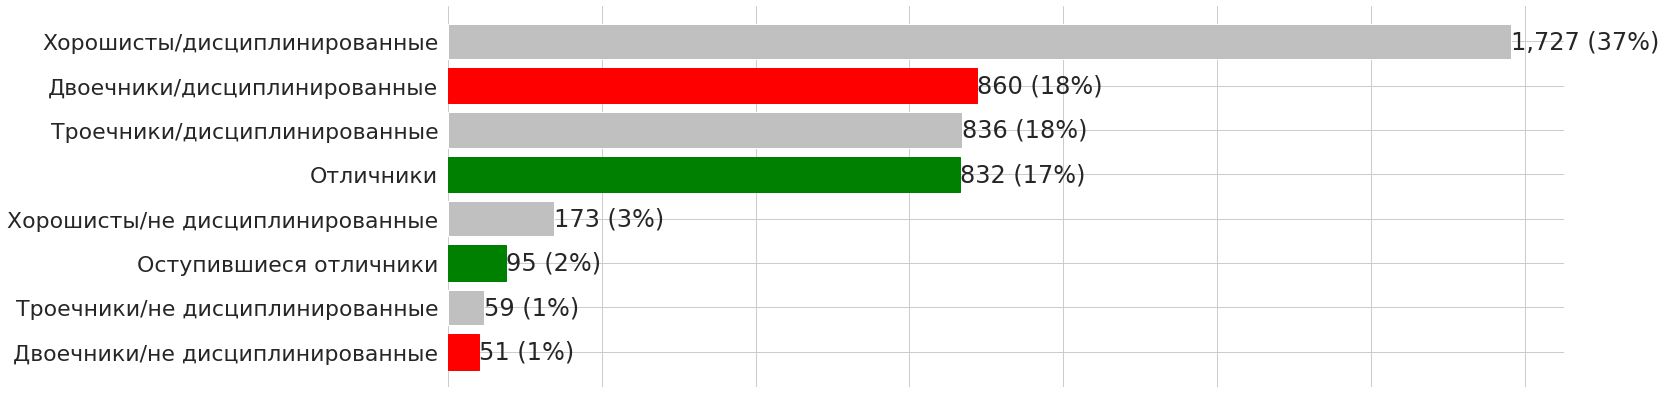

In [282]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['Отличники', 'Оступившиеся отличники']:
            bar.set_color('green')
        if segments_counts.index[i] in ['Двоечники/дисциплинированные','Двоечники/не дисциплинированные']:
            bar.set_color('red')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

Среди наших студентов больше всего хорошистов и двоечников. 